# TP5 - Visualisation sous `Python`

#### Analyse de Données Massives - Master 1ère année

Dans ce TP, nous allons utiliser les packages [`bokeh`](http://bokeh.pydata.org) et [`seaborn`](https://seaborn.pydata.org). Comme d'habitude, il faut tout d'abord installer les modules via un terminale de commande. Le module `pydataset` contient,lui, plusieurs jeux de données que nous allons utiliser.

```{bash}
pip3 install bokeh
pip3 install seaborn
pip3 install pydataset
```

Si vous rencontrez des erreurs pour l'installation d'un module, vous pouvez l'installer localement avec la commande suivante 

```{bash}
pip3 install --user package_name
```

Dans la suite, nous allons utiliser le jeu de données [`tips`](http://svitsrv25.epfl.ch/R-doc/library/reshape/html/tips.html), initialement présent dans le package `reshape2` de `R`. Pour le récupérer, on importe la fonction `data()` du module `pydataset`, et on l'obtient avec `data("tips")`. Pour avoir la liste des données présentes dans `pydataset`, vous pouvez taper la commande `data()` (ou aller voir [ici](https://github.com/iamaziz/PyDataset)). 

In [2]:
from pydataset import data
tips = data('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


Dans la suite, nous allons utiliser les modules `numpy` et `pandas` pour réaliser quelques manipulations.

In [5]:
import numpy
import pandas

## `bokeh`

Nous devons importer les modules dans le *notebook*. Voici tout d'abord les instructions pour `bokeh`. Pour ce module, ici, nous importons chaque fonction séparemment. Voici à quoi elles servent globalement :

- `output_notebook()` : initialise le *notebook* pour la visualisation des graphiques produits
- `show()` : montre le graphique
- `color()` : permet de spécifier la palette ou les couleurs
- `bins()` : découpe une variable quantitative en différents intervalles
- `layouts()` : permet de mettre plusieurs graphiques sur la même figure
- les autres : réalisent les différents graphiques

Il existe en plus des fonctions permettant de réaliser un graphique *à la main*, en accédant à des primitives de dessins, laissant libre cours à votre imagination en terme de **Dataviz**.

In [3]:
from bokeh.plotting import output_notebook, show
from bokeh.charts import color, Histogram, BoxPlot, Bar, Donut, Scatter, HeatMap, bins
from bokeh import layouts
output_notebook()

Loading BokehJS ...

### Variable quantitative

Dans aucun de ces deux modules, le *QQ plot* n'est implémenté directement, il faudra utiliser `scipy` pour le faire (non présenté ici).

C'est la fonction `Histogram()` qui nous permet de réaliser un histogramme donc, en effectif par défaut.

In [4]:
h = Histogram(tips.total_bill)
show(h)

Il est possible de spécifier le nombre d'intervalles, avec le paramètre `bins`.

In [5]:
h = Histogram(tips.total_bill, bins = 10)
show(h)

On peut aussi spécifier les limites des intervalles avec `bins`.

In [6]:
p = Histogram(tips.total_bill, bins = [5,10,20,30,60])
show(p)

Mais dans ce cas, le graphique est erroné. Il faut représenter la densité, ce qu'on obtient avec le paramètre `density`.

In [7]:
h = Histogram(tips.total_bill, density = True)
show(h)

Pour la boîte à moustaches, la fonction `BoxPlot()` est initialement prévu pour le croisement entre une variable qualitative (en $x$) et une variable quantitative (en $y$). Pour l'avoir en univarié, il nous faut donc créer une variable constante (nommée `const` ici, égale à `1`).

In [8]:
tips = tips.assign(const = 1)
p = BoxPlot(tips, values = "total_bill", label = "const")
show(p)

### Variable qualitative

Le diagramme en barres est réalisé avec la fonction `Bar()`. Il est possible de déterminer une couleur en fonction du sexe avec le paramètre `color`.

In [9]:
p = Bar(tips, label = "sex", color = "sex")
show(p)

Il est possible d'avoir le diagramme en barres empilées en représentant une constante en $x$, et en indiquant que l'empilage se fait sur la variable `sex` (avec le paramètre `stack`).

In [10]:
p = Bar(tips, "const", stack = "sex")
show(p)

Pour avoir ce diagramme sommé à 100, il est nécessaire de calculer tout d'abord les fréquences de chaque modalité dans un tableau. Puis de réprésenter ce tableau, en indiquant que les valeurs sont les pourcentages (via le paramètre `values`).

In [11]:
t = pandas.crosstab(tips.sex, "freq", normalize = True)
t = t.assign(sex = t.index, const = 1, percent = 100 * t.freq)
t

col_0,freq,const,percent,sex
sex,,,,
Female,0.356557,1,35.655738,Female
Male,0.643443,1,64.344262,Male


In [12]:
p = Bar(t, label = "const", values = "percent", stack = "sex")
show(p)

Enfin, le diagramme circulaire est fait via la fonction `Donut()`.

In [13]:
p = Donut(tips, "sex")
show(p)

### Var quantitative - Var quantitative

Le nuage de points e fait via la fonction `Scatter()`, en indiquant la variable en $x$ puis la variable en $y$.

In [14]:
p = Scatter(tips, "total_bill", "tip")
show(p)

Un autre graphique intéressant dans ce cas est une *heatmap*, qui est un histogramme en 2d. Pour cela, la fonction `HeatMap` a besoin d'avoir des variables découpées via la fonction `bins()`.

In [15]:
p = HeatMap(tips, bins("total_bill"), bins("tip"))
show(p)

Dans cette fonction `bins()`, comme pour un histogramme, il est possible de choisir son découpage avec le paramètre `bins` (soit via le nombre de *bins*, soit en donnant les limites des intervalles).

In [16]:
p = HeatMap(tips, bins("total_bill", bins = 5), bins("tip", bins = 7))
show(p)

### Var qualitative - Var qualitative

La fonction `Bar()` permet de réaliser le diagramme en barres séparées, en effectifs.

In [17]:
p = Bar(tips, "sex", group = "smoker")
show(p)

Pour avoir ce diagramme en pourcentages (ou proportions), il faut tout d'abord calculer les profils sur la variable `sex`.

In [18]:
t = pandas.crosstab(tips.sex, tips.smoker, normalize = "index")
t = t.assign(sex = t.index)
t

smoker,No,Yes,sex
sex,,,
Female,0.620690,0.379310,Female
Male,0.617834,0.382166,Male


Ensuite, nous utilisons la fonction `melt()` de `pandas` permettant de modifier la structure d'un tableau.

In [19]:
tm = pandas.melt(t, id_vars=["sex"])
tm.value = 100 * tm.value
tm

,sex,smoker,value
0,Female,No,62.068966
1,Male,No,61.783439
2,Female,Yes,37.931034
3,Male,Yes,38.216561


Enfin, à partir de cette table, il est facile de réaliser le diagramme en barres en pourcentages.

In [20]:
p = Bar(tm, label = "sex", values = "value", group = "smoker")
show(p)

Pour avoir la version empilée, en effectifs, on utilise le code suivant.

In [21]:
p = Bar(tips, "sex", stack = "smoker")
show(p)

En reprenant le tableau `tm` créé précédemment, il est possible maintenant d'avoir le diagramme en barres empilées, sommées à 100%.

In [22]:
p = Bar(tm, label = "sex", values = "value", stack = "smoker")
show(p)

Pour avoir un diagramme circulaire d'une variable par modalité d'une autre variable, il est nécessaire de créer plusieurs graphiques et de les mettre ensemble, avec la fonction `layouts.row()` (en lignes - et `.column()` en colonnes).

In [23]:
pSmokerYes = Donut(tips.query('smoker == "Yes"'), "sex", title = "Yes")
pSmokerNo  = Donut(tips.query('smoker == "No"'), "sex", title = "No")
p = layouts.row(pSmokerYes, pSmokerNo)
show(p)

Avec une *list comprehension* et l'utilisation de liste de paramètre (avec `*`), il est possible de réaliser cela en une seule étape.

In [24]:
p = layouts.row(*[Donut(tips.query('smoker == "' + m + '"'), "sex", title = 'smoker: ' + m) 
                  for m in tips.smoker.unique()])
show(p)

### Var quantitative - Var qualitative

La représentation la plus simple à obtenir est les boîtes à moustaches pour chaque modalité, grâce à la fonction `BoxPlot()`.

In [25]:
p = BoxPlot(tips, values = "total_bill", label = "sex", color = "sex")
show(p)

Ensuite, nous pouvons créer les histogrammes de `total_bill` pour chaque modalité de `sex`, avec un `layouts` en colonnes (`column()`).

In [26]:
p = layouts.column(*[Histogram(tips.query('sex == "' + m + '"'), 
                               "total_bill",
                               density = True,
                               title = 'sex: ' + m,
                               plot_height = 200,
                              ) 
                     for m in tips.sex.unique()])
show(p)

### Multivariables

#### Trois quantitatives

Dans ce cas, il est possible de réaliser une *heatmap*, dans laquelle chaque rectangle croisement de deux intervalles pour deux variables (ici `total_bill`et `size`) est coloré en fonction de la valeur moyenne d'une troisième variable (ici `tip`).

In [27]:
p = HeatMap(tips, x = bins("total_bill", bins = 5), y = "size", values = "tip",
           stat = "mean")
show(p)

#### 2 quantitatives + 1 qualitative

Ici, le plus simple est de réaliser un nuage de points, en colorant les points en fonction de la variable qualitative.

In [28]:
p = Scatter(tips, "total_bill", "tip", color = "sex")
show(p)

#### 1 quantitative + 2 qualitatives

En reprenant la fonction `BoxPlot()`, il est possible de créer un découpage sur plusieurs variables qualitatives en donnant une liste au paramètre `label`.

In [29]:
p = BoxPlot(tips, values = "total_bill", label = ["sex", "smoker"], color = ["sex", "smoker"])
show(p)

#### 3 qualitatives

Pour ce cas, on peut réaliser le diagramme en barres empilées (ou séparées) entre deux variables, pour chaque modalité d'une troisième variable.

In [30]:
p = layouts.column(*[Bar(tips.query('time == "' + m + '"'), "sex", 
                         stack = "smoker", title = 'time: ' + m,
                         plot_height = 200) 
                     for m in tips.time.unique()])
show(p)

Pour avoir la version sommée à 100%, il faut manipuler en deux étapes :

- créer les profils de `smoker` sur `sex`, pour chaque modalité de `time`
- réaliser l'ensemble des diagrammes en barres empilées

In [31]:
tm = [pandas.melt(pandas.crosstab(t.sex, t.smoker, normalize = "index")
                  .assign(sex = t.sex.unique()), id_vars = "sex") 
      for t in [tips.query("time == '" + m + "'") for m in tips.time.unique()]]

p = layouts.column(*[Bar(tm[i], label = "sex", values = "value", 
                         stack = "smoker", title = "time: " + tips.time.unique()[i],
                         plot_height = 200) 
                    for i in range(len(tm))])

show(p)

### Compléments

Voici quelques paramètres généraux permettant d'améliorer les graphiques :

- `title`, `xlabel`, `ylabel` : titre global et titres des axes
- `color` : définition de couleurs (il existe aussi des palettes)
- `plot_width` et `plot_height` : taille des figures
- `toolbar_location` : position de la barre d'outils

Il en existe d'autres, à vous de les explorer.

In [32]:
p = Scatter(tips, "total_bill", "tip",
            title = "Montant et pourboire en fonction du sexe",
            xlabel = "Montant total",
            ylabel = "Pourboire",
            color = color(["sex"], palette = ["blue", "orange"]),
            plot_width = 700, plot_height = 300,
            toolbar_location = "above")
show(p)

## `seaborn`

Ce module, importé ci-dessous, est basé sur `matplotlib`. Il faut donc ajouter la ligne `%matplotlib inline` dans un *notebook*, pour pouvoir voir les graphiques.

Ce module contient toutes les fonctions directement, l'importation est donc assez simple.

In [33]:
import seaborn

%matplotlib inline

### Variable quantitative

La fonction `distplot()` nous permet de réaliser les graphiques de distribution d'une variable quantitative. Par défaut, elle réaliser un histogramme avec une estimation de la densité.

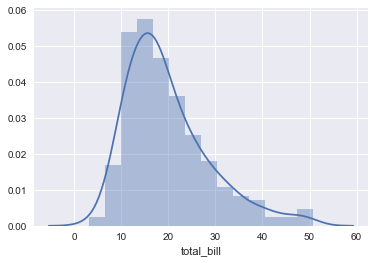

In [34]:
seaborn.distplot(tips.total_bill)

Pour ne garder que l'histogramme, on indique qu'on ne souhaite pas l'estimation de la densité (paramètre `kde`). Ainsi, l'histogramme devient en effectifs.

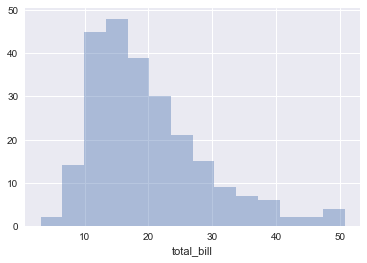

In [35]:
seaborn.distplot(tips.total_bill, kde = False)

De même, on ne peut vouloir que la densité. Auquel cas, on supprimer l'histogramme avec le paramètre `hist`.

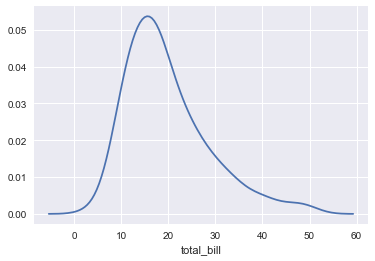

In [36]:
seaborn.distplot(tips.total_bill, hist = False)

Il est possible de choisir le nombre de bins, avec le paramètre `bins`.

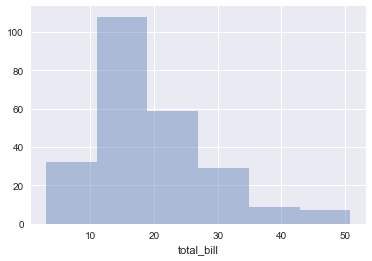

In [37]:
seaborn.distplot(tips.total_bill, bins = 6, kde = False)

Il est aussi possible de choisir les limites des intervalles, avec le même paramètre `bins`. Dans ce cas, il faut bien évidemment veiller à faire un histogramme en densité. Si on ne souhaite pas avoir l'estimation de la densité, on peut l'obtenir tout de même avec le paramètre `norm_hist`.

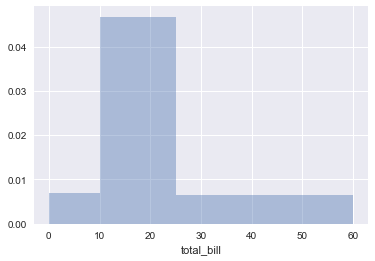

In [38]:
seaborn.distplot(tips.total_bill, bins = [0, 10, 25, 60], norm_hist = True, kde = False)

C'est la fonction `boxplot()` qui nous permet de réaliser une boîte à moustache (soit verticale en mettant la variable en `y`, soit horizontale en la mettant en `x`).

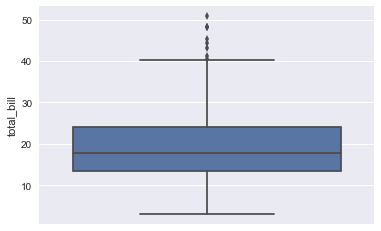

In [39]:
seaborn.boxplot(y = "total_bill", data = tips)

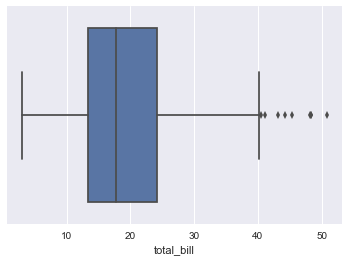

In [40]:
seaborn.boxplot(x = "total_bill", data=tips)

Une autre représentation possible est obtenue avec la fonction `pointplot()`, qui représente la moyenne et l'écarte-type, avec le choix entre vertical (`y`) ou horizontal (`x`).

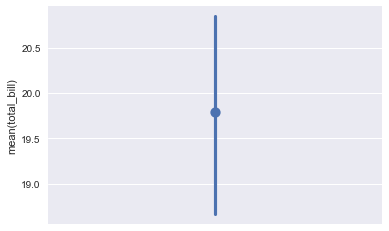

In [41]:
seaborn.pointplot(y = "total_bill", data = tips)

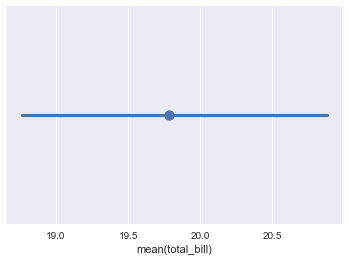

In [42]:
seaborn.pointplot(x = "total_bill", data = tips)

Un autre graphique possible est celui obtenu avec `violinplot()`, qui représente la densité d'une variable, toujours avec le choix vertical/horizontale (`y`/`x`).

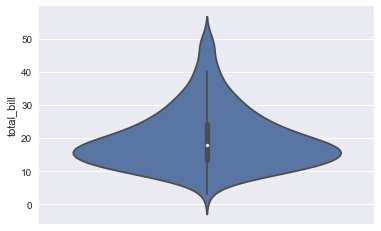

In [43]:
seaborn.violinplot(y = "total_bill", data = tips)

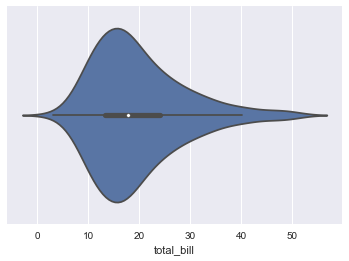

In [44]:
seaborn.violinplot(x = "total_bill", data = tips)

Enfin, il est possible de représenter toutes les valeurs sur un *pseudo* nuage de points. Avec `striplot()` dont l'option `jitter` a été activée, les points sont aléatoirement répartis sur l'axe des $x$ (si on utilise `y` - inversement sinon).

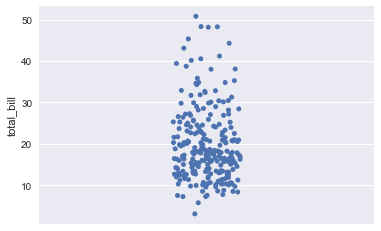

In [45]:
seaborn.stripplot(y = "total_bill", data = tips, jitter = True)

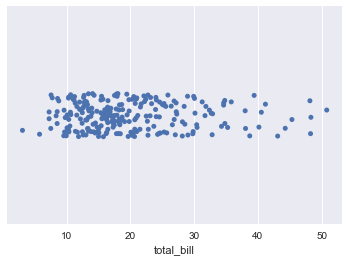

In [46]:
seaborn.stripplot(x = "total_bill", data = tips, jitter = True)

La fonction `factorplot()` regroupe l'ensemble des graphiques précédents (sauf l'histogramme) en une seule fonction. On accède aux différentes sous-fonctions en indiquant dans le paramètre `kind` :

- `point` : moyenne +/- écart-type
- `box` : boîte à moustaches
- `violin` : denisté (en symétrie)
- `strip` : *pseudo* nuage de points

In [ ]:
seaborn.factorplot(y = "total_bill", data = tips, kind = "point")

### Variable qualitative

Le diagramme en barres en effectifs est obtenu via la fonction `countplot()`. Il est soit horizontal (avec la variable en `x`), soit vertical (en `y`).

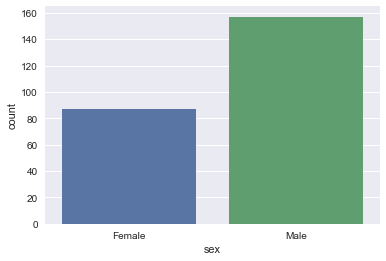

In [47]:
seaborn.countplot(x = "sex", data = tips)

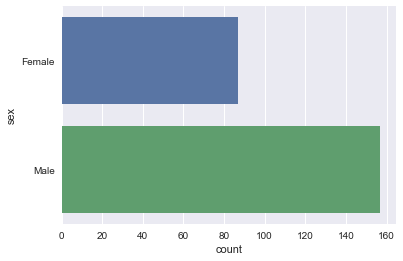

In [48]:
seaborn.countplot(y = "sex", data = tips)

Pour avoir la version en pourcentages (ou en proportions) de ce graphique, nous devons utiliser la fonction `barplot()`, sur la table de proportions calculée avant. Cette fonction réalise un calcul (moyenne par défaut) sur une variable (ici `freq`) en fonction des modalités d'une autre variable (`sex` ici donc).

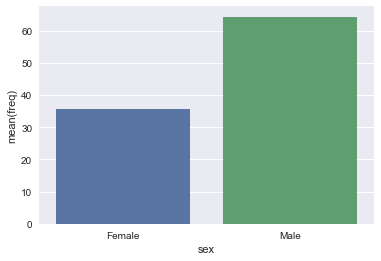

In [49]:
t = pandas.crosstab(tips.sex, "freq", normalize=True)
t = t.assign(sex = t.index, freq = 100 * t.freq)
seaborn.barplot(x = "sex", y = "freq", data = t)

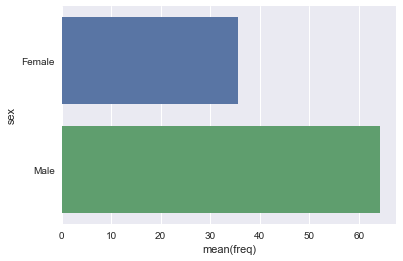

In [50]:
seaborn.barplot(x = "freq", y = "sex", data = t)

Pour réaliser un diagramme en barres empilées, il faudra le créer soi-même. Nous ne verrons pas ici.

Enfin, comme précédemment, la fonction `factorplot()` nous permet d'accéder aux sous-fonctions avec le choix dans `kind`.

- `count` : diagramme en barres (dénombrement)
- `bar` : diagramme en barres avec calcul

In [ ]:
seaborn.factorplot(x = "sex", data = tips, kind = "count")

### Var quantitative - Var quantitative

Pour réaliser le nuage de points, on utilise la fonction `jointplot()`. Elle a l'avantage d'ajouter par défaut les histogrammes de chaque variable. Elle réalise par défaut le nuage de points simple (`scatter`). Comme pour `factorplot()`, on va pouvoir choisir le type de graphique avec le paramètre `kind`.

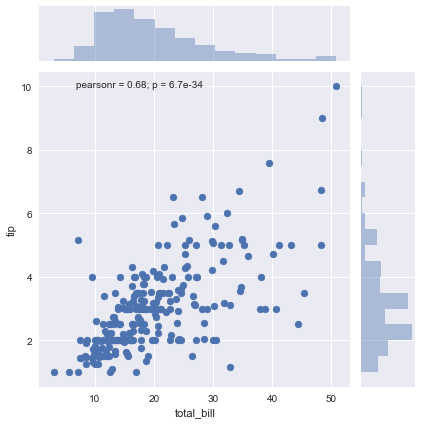

In [51]:
seaborn.jointplot(x = "total_bill", y = "tip", data = tips)

En choississant le type `reg`, on obtient en plus l'ajustement linéaire de la variable en `y` par celle en `x`.

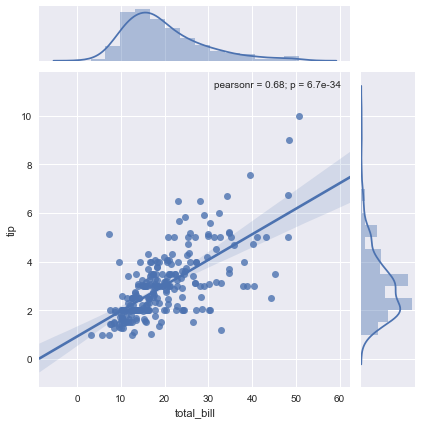

In [52]:
seaborn.jointplot(x = "total_bill", y = "tip", data = tips, kind = "reg")

On peut obtenir une *heatmap*, non pas avec des rectangles mais un pavage hexagonal, avec `kind = "hex"`.

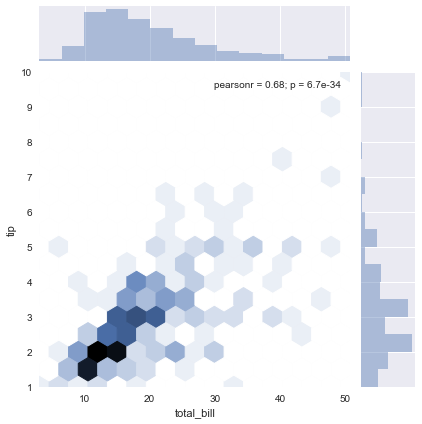

In [53]:
seaborn.jointplot(x = "total_bill", y = "tip", data = tips, kind = "hex")

Enfin, on peut avoir une estimation de la densité en 2d avec le type `kde`.

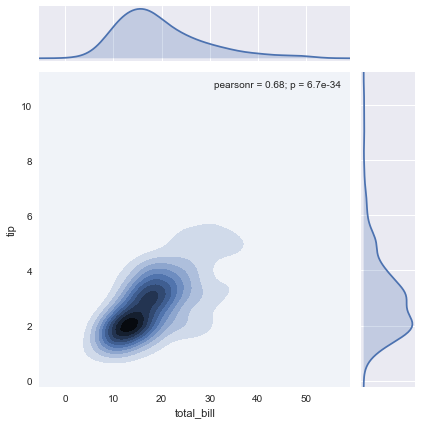

In [54]:
seaborn.jointplot(x = "total_bill", y = "tip", data = tips, kind = "kde")

Si on souhaite ne pas avoir les distributions marginales, la fonction `regplot()` nous permet de réaliser le nuage de points avec ou sans ajustement (paramètre `fit_reg`). On peut aussi n'afficher que l'ajustement.

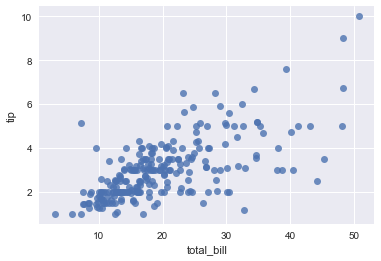

In [55]:
seaborn.regplot("total_bill", "tip", data = tips, fit_reg = False)

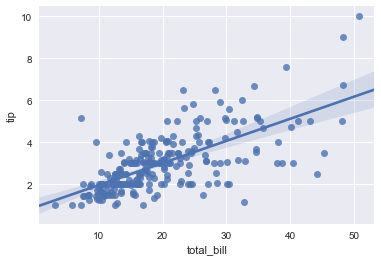

In [56]:
seaborn.regplot("total_bill", "tip", data = tips)

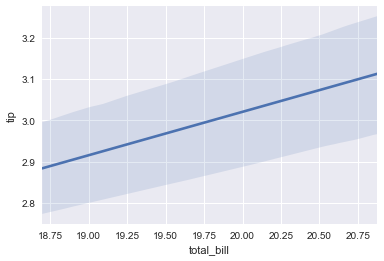

In [57]:
seaborn.regplot("total_bill", "tip", data = tips, scatter = False)

Il est possible d'obtenir directement tous les nuages de points 2 à 2, avec la fonction `pairplot()`. Le paramètre `vars` permet de sélectionner certaines variables. Par défaut, la fonction utilise toutes les variables numériques.

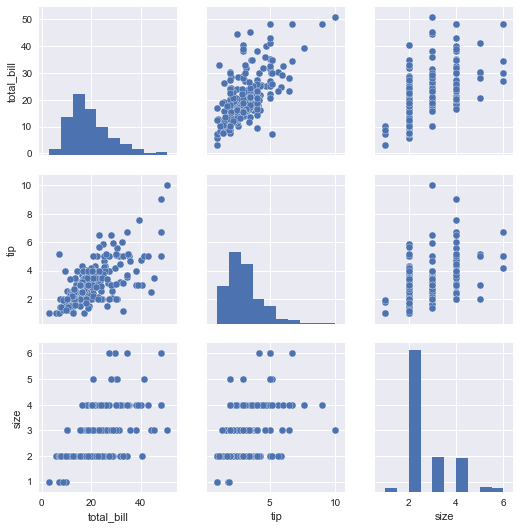

In [58]:
seaborn.pairplot(data = tips, vars = ["total_bill", "tip", "size"])

### Var qualitative - Var qualitative

Pour obtenir le diagramme en barres séparées (en effectifs), nous utilisons la fonction `factorplot()` avec le paramètre `hue` (celui-ci provient de la fonction `countplot()`).

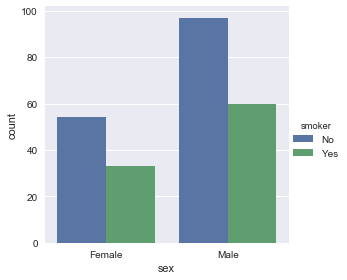

In [59]:
seaborn.factorplot(x = "sex", hue = "smoker", data = tips, kind = "count")

Cette fonction `factorplot()` permet aussi un découpage en facette avec les paramètres `row` et `col`. Ici, nous découpons donc le graphique en fonction des modalités de `smoker`.

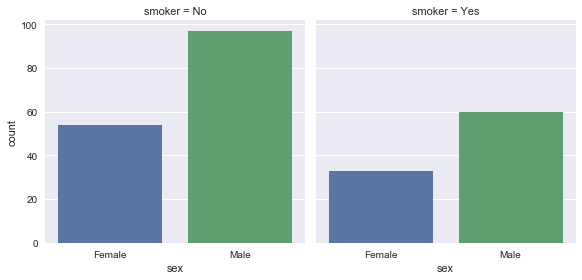

In [60]:
seaborn.factorplot(x = "sex", col = "smoker", data = tips, kind = "count")

Pour avoir la version en pourcentages, il faut faire les calculs avant, modifier la structure du résultat et les afficher ensuite.

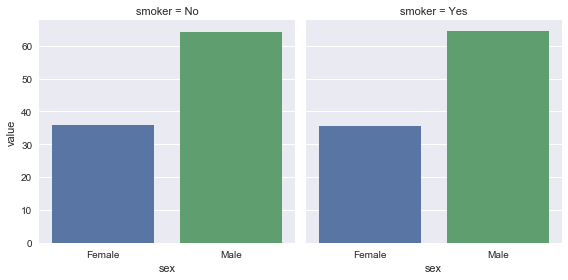

In [61]:
t = pandas.crosstab(tips.sex, tips.smoker, normalize = "columns")
t = t.assign(sex = t.index)
tm = pandas.melt(t, id_vars = "sex")
tm = tm.assign(value = 100 * tm.value)

seaborn.factorplot("sex", y = "value", col = "smoker", data = tm, kind = "bar")

Une autre représentation est de visualiser la table de contingence avec une *heatmap* (la couleur dépendra du nombre d'individus pour chaque couple de modalité).

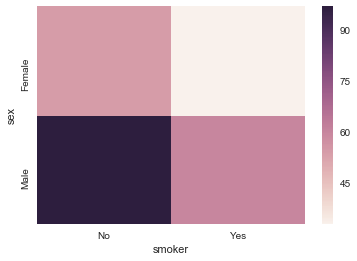

In [62]:
seaborn.heatmap(pandas.crosstab(tips.sex, tips.smoker))

### Var quantitative - Var qualitative

Pour réaliser les histogrammes de la variable quantitative pour chaque modalité de la variable qualitative, il faut passer par la fonction `FacetGrid()`, permettant de faire un découpage en plusieurs lignes (avec `row`) et/ou en plusieurs colonnes (avec `col`). On applique ensuite la fonction `distplot()` avec les paramètres (ici la variable `total_bill`).

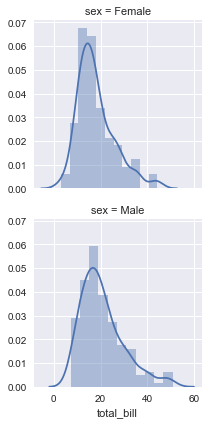

In [63]:
p = seaborn.FacetGrid(tips, row = "sex")
p.map(seaborn.distplot, "total_bill")

Les boîtes à moustaches sont elles faciles à créer avec `factorplot()` (ou `boxplot()` directement).

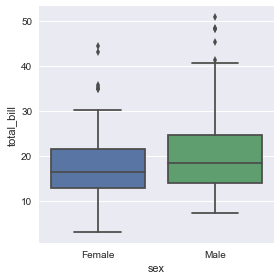

In [64]:
seaborn.factorplot(x = "sex", y = "total_bill", data = tips, kind = "box")

On peut aussi représenter la moyenne et l'écart-type à l'aide du graphique `pointplot`.

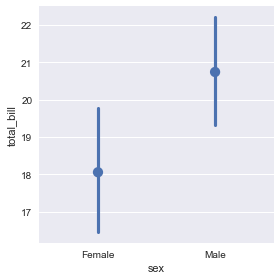

In [65]:
seaborn.factorplot(x = "sex", y = "total_bill", data = tips, kind = "point", join = False)

Le graphique `violinplot` est bien sûr lui aussi applicable dans ce cas.

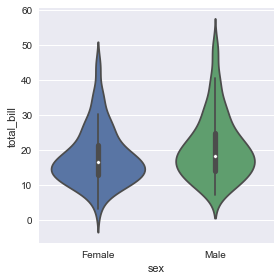

In [66]:
seaborn.factorplot(x = "sex", y = "total_bill", data = tips, kind = "violin")

On a aussi la possibilité de représenter le *pseudo* nuage de points, avec `stripplot` (avec `jitter` à `True`.

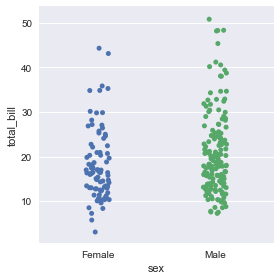

In [67]:
seaborn.factorplot(x = "sex", y = "total_bill", data = tips, kind = "strip", jitter = True)

## Multivariables

#### 3 quantitatives

Dans ce cas, nous cherchons à faire une *heatmap* du croisement entre les versions discrétisées en intervalles de deux variables quantitatives, la couleur d'un rectangle dépendant de la moyenne (ici `mean` du module `numpy`) d'une troisième variable. On créé la table puis l'affiche.

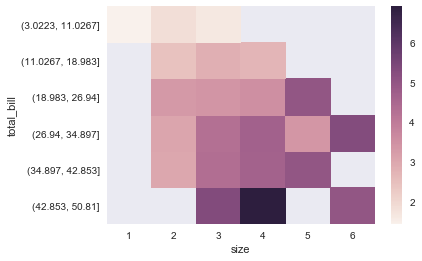

In [68]:
t = pandas.crosstab(pandas.cut(tips.total_bill, bins = 6),
                    tips["size"],
                    values = tips.tip, aggfunc = numpy.mean)
seaborn.heatmap(t)

#### 2 quantitatives et 1 qualitative

Dans ce cas, il est possible de faire le nuage de points avec la fonction `lmplot()`, en utilisant le principe de grille (comme `factorplot()`) avec un découpage en colonnes (via `col`). On peut aussi améliorer la distinction en ajoutant une couleur différente sur la variable `sex` avec le paramètre `hue`.

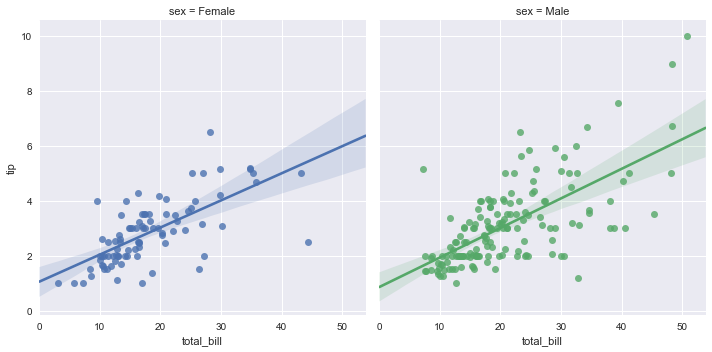

In [69]:
seaborn.lmplot("total_bill", "tip", hue = "sex", col = "sex", data = tips)

#### 1 quantitative et 2 qualitatives

Il est possible de créer les histogrammes de la variable quantitative pour chaque couple de modalités sur les deux variables qualitatives avec `FacetGrid()`.

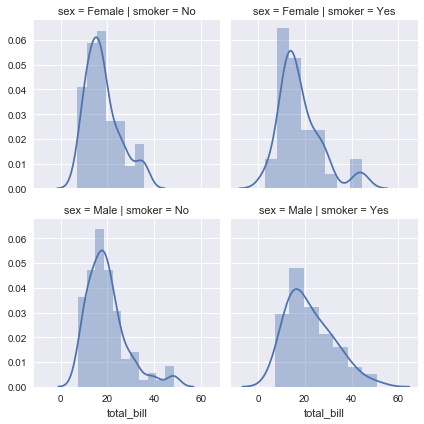

In [70]:
p = seaborn.FacetGrid(tips, row = "sex", col = "smoker")
p.map(seaborn.distplot, "total_bill")

Pour les boîtes à moustaches, on utilise la fonction `factorplot()` qui permet d'ajouter une couleur en fonction d'une variable qualitative via le paramètre `hue`.

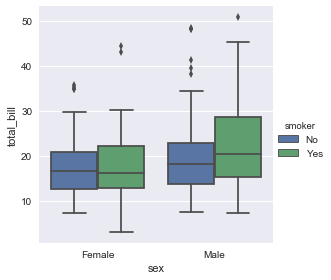

In [71]:
seaborn.factorplot(x = "sex", y = "total_bill", hue = "smoker", data = tips, kind = "box")

Cette même fonction `factorplot()` permet le découpage en lignes (`row`) ou en colonnes (`col`), qui nous est utile pour le graphique `point`.

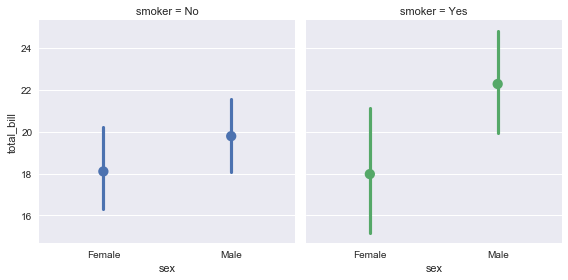

In [72]:
seaborn.factorplot(x = "sex", y = "total_bill", hue = "smoker", col = "smoker", data = tips, 
                   kind = "point", join = False)

Le graphique `violin` s fait lui très facilement.

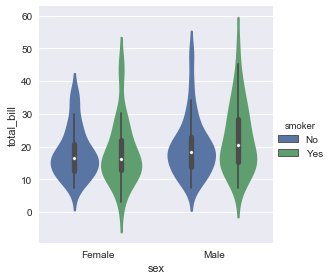

In [73]:
seaborn.factorplot(x = "sex", y = "total_bill", hue = "smoker", data = tips, kind = "violin")

Et pour le graphique `strip`, on reprend le découpage via `col`.

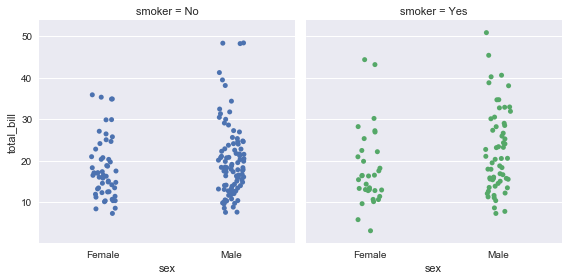

In [74]:
seaborn.factorplot(x = "sex", y = "total_bill", hue = "smoker", col = "smoker", data = tips, 
                   kind = "strip", jitter = True)

#### 3 qualitatives

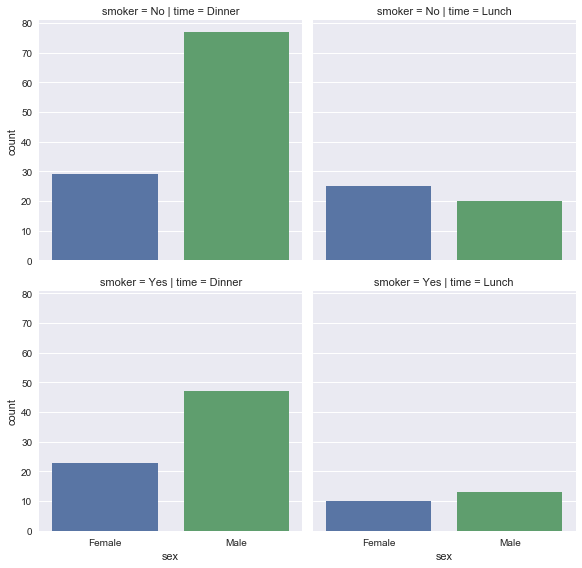

In [75]:
seaborn.factorplot(x = "sex", row = "smoker", col = "time", data = tips, kind = "count")

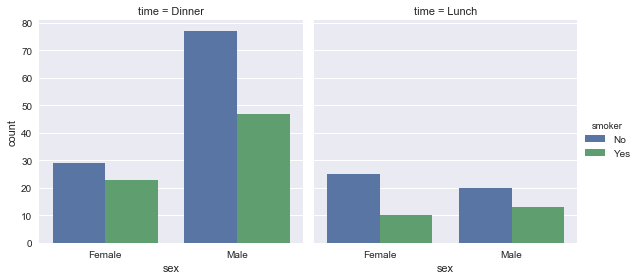

In [76]:
seaborn.factorplot(x = "sex", hue = "smoker", col = "time", data = tips, kind = "count")

Pour avoir la version sommée à 100%, il faut calculer la table en premier, la restructurer et l'afficher.

In [77]:
t = pandas.crosstab([tips.smoker, tips.time], tips.sex, normalize = "index")
t = t.assign(smoker_time = t.index)
tm = pandas.melt(t, id_vars="smoker_time")
tm = tm.assign(value = 100 * tm.value)

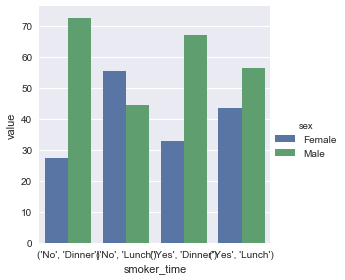

In [78]:
seaborn.factorplot(x = "smoker_time", y = "value", hue = "sex", data = tm, 
                   kind = "bar")

### Compléments

Il est bien évidemment possible de personnaliser le graphique de différentes façons, dont certains sont présentées ci-dessous. On accède aux fonctions de personnalisation soit via des paramètres de la fonction, soit via l'objet renvoyé par la fonction utilisée pour créer le graphique, soit via le module directement. Dans ce cas, ce sont des changements qui affecteront aussi les graphiques futurs.

- `suptitle` dans `fig` : titre global
- `set_axis_labels` : titre des axes
- `palette` : choix d'une palette de couleurs 
- `size` et `aspect` : hauteur et ratio entre hauteur et largeur, pour chaque facette (une seule ici)

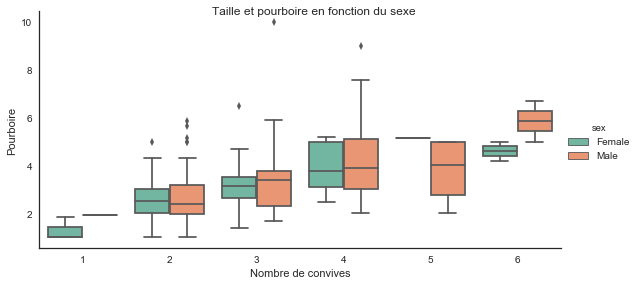

In [79]:
seaborn.set_style("white")
p = seaborn.factorplot(x = "size", y = "tip", hue = "sex", data = tips, kind = "box",
                      palette = "Set2", size = 4, aspect = 2)
p.fig.suptitle("Taille et pourboire en fonction du sexe")
p.set_axis_labels("Nombre de convives", "Pourboire")


## A faire 



A partir du jeu de données `Computers` présent dans le module `pydataset`, vous devez répondre aux questions suivantes, avec `bokeh` et `seaborn`. Vous pourrez trouver des informations sur ce jeu de données en exécutant `data("Computers", show_doc = True)` dans le *notebook*.

In [3]:
ordis = data("Computers")
ordis.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
1,1499,25,80,4,14,no,no,yes,94,1
2,1795,33,85,2,14,no,no,yes,94,1
3,1595,25,170,4,15,no,no,yes,94,1
4,1849,25,170,8,14,no,no,no,94,1
5,3295,33,340,16,14,no,no,yes,94,1


In [4]:
ordis.to_csv("donnees/Computers.csv")

Vous pouvez télécharger le fichier [`Computers.csv`](donnees/Computers.csv), s'il n'est pas présent dans votre installation du module `pydataset`. Voici comment le charger dans `python` avec la librairie `pandas`. 

In [6]:
ordis_csv = pandas.read_csv("donnees/Computers.csv")
ordis_csv.head()

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1


1. Représenter graphiquement la variable `price` (histogramme, boîte à moustaches, ...)
1. Représenter le lien entre la variable `price` et les variables
    - `speed`
    - `hd`
    - `ram`
    - `cd`
    - `premium`
    - `screen`
1. Représenter sur `price` l'impact de ces couples de variables
    - `speed` et `hd`
    - `hd` et `screen`
    - `speed` et `premium`
    - `hd` et `premium`
1. Proposer des représentations graphiques, toujours pour décrire `price` en fonction d'autres variables, mais prenant en compte plus de trois variables

### `anscombe`

Représenter sur un même graphique (avec un découpage donc) les quatre séries des données `anscombe`, toujours avec `bokeh` et `seaborn`.

In [111]:
anscombe = data("anscombe")
anscombe

,x1,x2,x3,x4,y1,y2,y3,y4
1,10,10,10,8,8.04,9.14,7.46,6.58
2,8,8,8,8,6.95,8.14,6.77,5.76
3,13,13,13,8,7.58,8.74,12.74,7.71
4,9,9,9,8,8.81,8.77,7.11,8.84
5,11,11,11,8,8.33,9.26,7.81,8.47
6,14,14,14,8,9.96,8.10,8.84,7.04
7,6,6,6,8,7.24,6.13,6.08,5.25
8,4,4,4,19,4.26,3.10,5.39,12.50
9,12,12,12,8,10.84,9.13,8.15,5.56
10,7,7,7,8,4.82,7.26,6.42,7.91
